In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv('datasets/weight-height.csv')

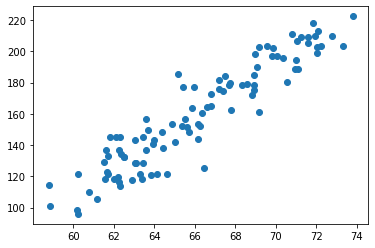

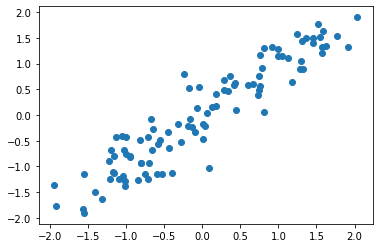

In [3]:
data = df.sample(100)[['Height', 'Weight']].to_numpy()
m = data.shape[0] # number of samples
x = data[:,0].reshape((m, 1))
x_mean = np.mean(x)
x_std = np.std(x)
x_scaled = (x-x_mean)/x_std

y=data[:,1].reshape((m, 1))
y_mean =np.mean(y)
y_std = np.std(y)
y_scaled = (y-y_mean)/y_std

plt.scatter(x=x, y=y)
plt.show()
plt.scatter(x=x_scaled, y=y_scaled)
plt.show()

1
[[0.0667151 ]
 [0.54140877]]
0.285681050093619


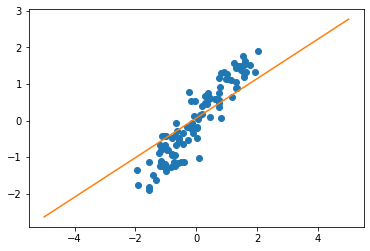

W0729 10:05:26.612653 140210053777216 deprecation.py:323] From /home/hotohoto/playground/py2ml_course/venv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


20
[[-0.01826471]
 [ 0.83719544]]
0.13651103119990696


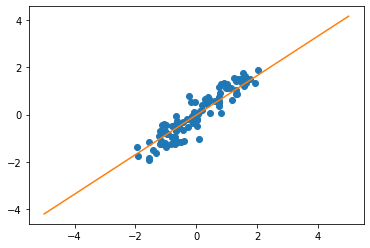

40
[[-0.00709366]
 [ 0.907883  ]]
0.1274679974522612


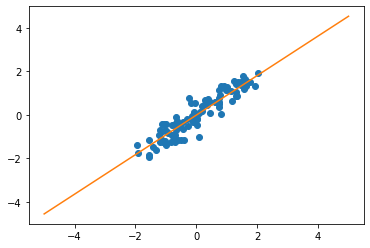

60
[[0.00218699]
 [0.92388484]]
0.1268266680331317


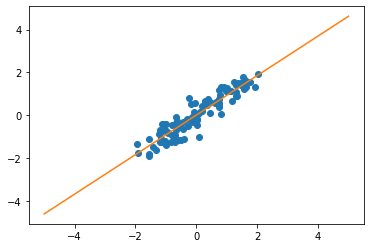

80
[[-0.0009669 ]
 [ 0.92963689]]
0.12673378488525805


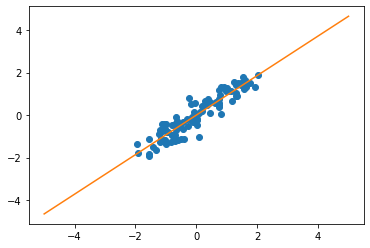

100
[[9.07349170e-05]
 [9.33786468e-01]]
0.1267097150797871


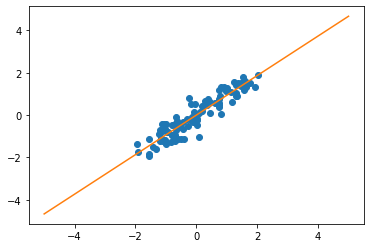

In [4]:
input_data = tf.constant(np.hstack((np.ones((m,1)), x_scaled)))
ground_truth = tf.constant(y_scaled)
theta = tf.Variable(np.random.rand(2, 1))

optimizer = tf.keras.optimizers.Adam(0.1)


def get_cost():
    return 1 / m * tf.math.reduce_sum((input_data@theta - ground_truth)**2)

for i in range(100):
    def draw_chart():
        print(i + 1)
        print(theta.numpy())
        print(get_cost().numpy())

        fig, axs = plt.subplots(1, 1)
        axs.scatter(x=x_scaled, y=y_scaled)
        x_tmp = np.linspace(-5,5,50)
        y_tmp = np.column_stack((np.ones(50), x_tmp))@theta.numpy()
        axs.plot(x_tmp, y_tmp, color="C1")
        plt.show()
        
    if i is 0:
        draw_chart()
    
    optimizer.minimize(get_cost, var_list=[theta])

    if (i + 1) % 20 == 0:
        draw_chart()

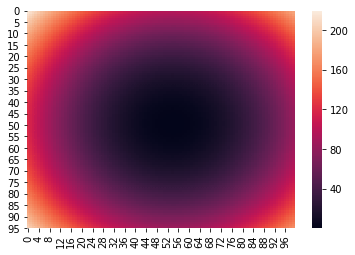

In [5]:
n0 = 100
n1 = 100
theta0 = np.linspace(-10, 10, n0)
theta1 = np.linspace(-10, 10, n1)
costs_on_theta_space = np.empty((n0, n1), dtype=float)

for i in range(theta0.shape[0]):
    for j in range(theta1.shape[0]):
        costs_on_theta_space[i, j] = (1 / 100) * np.sum(( input_data.numpy()@np.array([[ theta0[i] ], [ theta1[j] ] ]) - ground_truth.numpy() )**2)
        
ax = sns.heatmap(costs_on_theta_space)